# Study Case Data Analysis
- **Nama:** Dicky Pratama Kusuma
- **Email:** prtmaars@gmail.com
- [LinkedIn](https://www.linkedin.com/in/dickypratamakusuma/) [GitHub](https://github.com/prtmaars)

## Sales Efficiency and Profitability

The dataset encompasses the following key attributes:

1. date
2. channel_id
3. category_id
4. supplier_id
5. status
6. revenue
7. cost
8. commission
9. count

**Problem Analysis:**
1. Analisis 2 channel yang menurut Anda memiliki performa penjualan paling baik.
2. Analisis 2 channel yang menurut Anda memiliki performa penjualan paling buruk.
3. Analisis top 2 industri yang paling profitable untuk perusahaan ini.
4. Analisis top 2 kategori yang paling profitable untuk perusahaan ini.
5. Siapa PIC yang memilki performa paling baik dari profit yang dihasilkan?
6. Siapa PIC yang memilki performa paling buruk dari profit yang dihasilkan?
7. Analisis bagaimana tren profit pada tahun 2020.
8. Apakah Anda menyarankan untuk menutup perusahaan ini?

In [297]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [298]:
data_order = pd.read_csv('C:/Users/prtma/OneDrive/Documents/GitHub/Sales-Efficiency-and-Profitability/data/order.csv')
data_category = pd.read_csv('C:/Users/prtma/OneDrive/Documents/GitHub/Sales-Efficiency-and-Profitability/data/category.csv')
data_channel = pd.read_csv('C:/Users/prtma/OneDrive/Documents/GitHub/Sales-Efficiency-and-Profitability/data/channel.csv')
data_industry = pd.read_csv('C:/Users/prtma/OneDrive/Documents/GitHub/Sales-Efficiency-and-Profitability/data/industry.csv')
data_supplier = pd.read_csv('C:/Users/prtma/OneDrive/Documents/GitHub/Sales-Efficiency-and-Profitability/data/supplier.csv')
data_pic = pd.read_csv('C:/Users/prtma/OneDrive/Documents/GitHub/Sales-Efficiency-and-Profitability/data/pic.csv')

### Assessing Data

In [299]:
data_order

,date,channel_id,category_id,supplier_id,status,revenue,cost,commission,count
0,1/1/2020,1,1,1,0,98845,99048,2970,3
1,1/1/2020,1,2,1,1,879565,879563,26387,2
2,1/1/2020,1,3,2,1,322580,322227,0,1
3,1/1/2020,1,4,3,1,1945450,1830540,0,7592
4,1/1/2020,1,4,3,0,310835,296239,3110,200
...,...,...,...,...,...,...,...,...,...
86028,3/31/2021,33,11,10,1,528405,349355,10570,82
86029,3/31/2021,33,9,21,1,1844385,1844010,0,1
86030,3/31/2021,33,7,26,1,1816005,1817735,36320,4
86031,3/31/2021,33,4,30,1,1911990,1911951,0,7


In [300]:
data_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86033 entries, 0 to 86032
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         86033 non-null  object
 1   channel_id   86033 non-null  int64 
 2   category_id  86033 non-null  int64 
 3   supplier_id  86033 non-null  int64 
 4   status       86033 non-null  int64 
 5   revenue      86033 non-null  int64 
 6   cost         86033 non-null  int64 
 7   commission   86033 non-null  int64 
 8   count        86033 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 5.9+ MB


### Cleaning Data

In [301]:
data_order.shape

(86033, 9)

In [302]:
data_order.duplicated().sum()

np.int64(0)

In [303]:
data_order.isna().sum()

date           0
channel_id     0
category_id    0
supplier_id    0
status         0
revenue        0
cost           0
commission     0
count          0
dtype: int64

In [304]:
data_category

,category_id,category_name,Unnamed: 2,Unnamed: 3
0,1,Electricity,NaN,NaN
1,2,Digital Voucher,NaN,NaN
2,3,Landline,NaN,NaN
3,4,Prepaid Mobile,NaN,NaN
4,5,Game Voucher,NaN,NaN
5,6,E-Money Top Up,NaN,NaN
6,7,Water,NaN,NaN
7,8,Mobile Data,NaN,NaN
8,9,Digital Cable TV,NaN,NaN
9,10,EMI Payments,NaN,NaN


In [305]:
data_category.loc[data_category['category_name'] == 'Streaming Subscription', 'category_name'] = 'Streaming Subscription Broadband'

In [306]:
data_category = data_category.drop(['Unnamed: 2', 'Unnamed: 3'], axis=1)

In [307]:
data_category

,category_id,category_name
0,1,Electricity
1,2,Digital Voucher
2,3,Landline
3,4,Prepaid Mobile
4,5,Game Voucher
5,6,E-Money Top Up
6,7,Water
7,8,Mobile Data
8,9,Digital Cable TV
9,10,EMI Payments


In [308]:
data_channel

,channel_id,channel_name,industry_id,pic_id
0,1,Fashionista,4,4
1,2,Paid.ly,3,1
2,3,Brite Bank,1,8
3,4,Amed Drugstore,4,8
4,5,Shoppertize,2,8
...,...,...,...,...
72,73,CartShoppe,2,3
73,74,Car Go,4,7
74,75,Reinstock,1,2
75,76,Merchaant,4,6


In [309]:
data_channel.isna().sum()

channel_id      0
channel_name    0
industry_id     0
pic_id          0
dtype: int64

In [310]:
data_channel.duplicated().sum()

np.int64(0)

In [311]:
data_industry

,industry_id,industry_name
0,1,Bank
1,2,Ecommerce
2,3,Finance
3,4,Retail
4,5,Technology
5,6,Travel


In [312]:
data_supplier

,supplier_id,supplier_code
0,1,LNAM
1,2,WMWK
2,3,UVOX
3,4,WRIF
4,5,SIKN
5,6,QFXM
6,7,ZYYT
7,8,VSQU
8,9,ZVCE
9,10,TNQT


In [313]:
data_supplier.duplicated().sum()

np.int64(0)

In [314]:
data_pic

,pic_id,pic_name
0,1,Rahayu Paulin Wulandari
1,2,Fathonah Hartati
2,3,Dewi Rachel Anggraini
3,4,Lala Lailasari
4,5,Dacin Nainggolan
5,6,Ismail Salahudin
6,7,Daliman Pradipta
7,8,Fitriani Alika Hastuti


In [315]:
data_merged = pd.merge(data_order, data_channel[['channel_id', 'industry_id', 'pic_id']], on='channel_id', how='left')

In [316]:
data_merged

,date,channel_id,category_id,supplier_id,status,revenue,cost,commission,count,industry_id,pic_id
0,1/1/2020,1,1,1,0,98845,99048,2970,3,4,4
1,1/1/2020,1,2,1,1,879565,879563,26387,2,4,4
2,1/1/2020,1,3,2,1,322580,322227,0,1,4,4
3,1/1/2020,1,4,3,1,1945450,1830540,0,7592,4,4
4,1/1/2020,1,4,3,0,310835,296239,3110,200,4,4
...,...,...,...,...,...,...,...,...,...,...,...
86028,3/31/2021,33,11,10,1,528405,349355,10570,82,4,1
86029,3/31/2021,33,9,21,1,1844385,1844010,0,1,4,1
86030,3/31/2021,33,7,26,1,1816005,1817735,36320,4,4,1
86031,3/31/2021,33,4,30,1,1911990,1911951,0,7,4,1


In [317]:
new_order = ['date', 'channel_id', 'industry_id', 'pic_id', 'category_id', 'supplier_id', 
             'status', 'revenue', 'cost', 'commission', 'count']
data_analysis = data_merged.reindex(columns=new_order)

In [318]:
data_analysis

,date,channel_id,industry_id,pic_id,category_id,supplier_id,status,revenue,cost,commission,count
0,1/1/2020,1,4,4,1,1,0,98845,99048,2970,3
1,1/1/2020,1,4,4,2,1,1,879565,879563,26387,2
2,1/1/2020,1,4,4,3,2,1,322580,322227,0,1
3,1/1/2020,1,4,4,4,3,1,1945450,1830540,0,7592
4,1/1/2020,1,4,4,4,3,0,310835,296239,3110,200
...,...,...,...,...,...,...,...,...,...,...,...
86028,3/31/2021,33,4,1,11,10,1,528405,349355,10570,82
86029,3/31/2021,33,4,1,9,21,1,1844385,1844010,0,1
86030,3/31/2021,33,4,1,7,26,1,1816005,1817735,36320,4
86031,3/31/2021,33,4,1,4,30,1,1911990,1911951,0,7


In [319]:
data_analysis.isna().sum()

date           0
channel_id     0
industry_id    0
pic_id         0
category_id    0
supplier_id    0
status         0
revenue        0
cost           0
commission     0
count          0
dtype: int64

In [320]:
data_analysis.duplicated().sum()

np.int64(0)

In [321]:
data_analysis['industry_id'].nunique()

6

In [322]:
data_analysis['pic_id'].nunique()

8

In [323]:
category_map = dict(zip(data_category['category_id'], data_category['category_name']))
channel_map = dict(zip(data_channel['channel_id'], data_channel['channel_name']))
industry_map = dict(zip(data_industry['industry_id'], data_industry['industry_name']))
supplier_map = dict(zip(data_supplier['supplier_id'], data_supplier['supplier_code']))
pic_map = dict(zip(data_pic['pic_id'], data_pic['pic_name']))

## Exploratory Data Analysis (EDA)

In [324]:
data_analysis

,date,channel_id,industry_id,pic_id,category_id,supplier_id,status,revenue,cost,commission,count
0,1/1/2020,1,4,4,1,1,0,98845,99048,2970,3
1,1/1/2020,1,4,4,2,1,1,879565,879563,26387,2
2,1/1/2020,1,4,4,3,2,1,322580,322227,0,1
3,1/1/2020,1,4,4,4,3,1,1945450,1830540,0,7592
4,1/1/2020,1,4,4,4,3,0,310835,296239,3110,200
...,...,...,...,...,...,...,...,...,...,...,...
86028,3/31/2021,33,4,1,11,10,1,528405,349355,10570,82
86029,3/31/2021,33,4,1,9,21,1,1844385,1844010,0,1
86030,3/31/2021,33,4,1,7,26,1,1816005,1817735,36320,4
86031,3/31/2021,33,4,1,4,30,1,1911990,1911951,0,7


In [325]:
data_analysis.describe()

,channel_id,industry_id,pic_id,category_id,supplier_id,status,revenue,cost,commission,count
count,86033.000000,86033.000000,86033.000000,86033.000000,86033.000000,86033.000000,8.603300e+04,8.603300e+04,86033.000000,86033.000000
mean,16.411819,3.108121,3.894912,7.148594,15.904374,0.664071,1.002063e+06,9.442682e+05,8653.302884,552.503516
std,19.727119,1.175872,2.310391,4.939329,12.448404,0.472317,5.759612e+05,1.047914e+06,13935.529526,4297.867280
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.015000e+03,-4.382092e+07,0.000000,1.000000
25%,1.000000,2.000000,2.000000,4.000000,3.000000,0.000000,5.043400e+05,4.766940e+05,0.000000,3.000000
50%,9.000000,4.000000,4.000000,6.000000,14.000000,1.000000,1.003585e+06,9.805200e+05,0.000000,11.000000
75%,25.000000,4.000000,6.000000,8.000000,29.000000,1.000000,1.499100e+06,1.485610e+06,13829.000000,69.000000
max,77.000000,6.000000,8.000000,26.000000,50.000000,1.000000,1.999940e+06,1.976821e+07,59990.000000,150697.000000


In [326]:
data_analysis['cost'] = data_analysis['cost'].abs()

In [327]:
data_analysis['profit'] = data_analysis['revenue'] - data_analysis['cost'] - data_analysis['commission']

In [328]:
new_order = ['date', 'channel_id', 'industry_id', 'pic_id', 'category_id', 'supplier_id', 
             'status', 'revenue', 'cost', 'profit', 'commission', 'count']
data_analysis = data_analysis.reindex(columns=new_order)

In [329]:
data_analysis.describe()

,channel_id,industry_id,pic_id,category_id,supplier_id,status,revenue,cost,profit,commission,count
count,86033.000000,86033.000000,86033.000000,86033.000000,86033.000000,86033.000000,8.603300e+04,8.603300e+04,8.603300e+04,86033.000000,86033.000000
mean,16.411819,3.108121,3.894912,7.148594,15.904374,0.664071,1.002063e+06,1.036539e+06,-4.312965e+04,8653.302884,552.503516
std,19.727119,1.175872,2.310391,4.939329,12.448404,0.472317,5.759612e+05,9.567398e+05,7.703670e+05,13935.529526,4297.867280
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.015000e+03,5.900000e+01,-4.334032e+07,0.000000,1.000000
25%,1.000000,2.000000,2.000000,4.000000,3.000000,0.000000,5.043400e+05,4.936830e+05,-1.398900e+04,0.000000,3.000000
50%,9.000000,4.000000,4.000000,6.000000,14.000000,1.000000,1.003585e+06,9.936100e+05,-6.500000e+01,0.000000,11.000000
75%,25.000000,4.000000,6.000000,8.000000,29.000000,1.000000,1.499100e+06,1.495740e+06,2.400000e+03,13829.000000,69.000000
max,77.000000,6.000000,8.000000,26.000000,50.000000,1.000000,1.999940e+06,4.382092e+07,1.859356e+06,59990.000000,150697.000000


In [330]:
data_analysis

,date,channel_id,industry_id,pic_id,category_id,supplier_id,status,revenue,cost,profit,commission,count
0,1/1/2020,1,4,4,1,1,0,98845,99048,-3173,2970,3
1,1/1/2020,1,4,4,2,1,1,879565,879563,-26385,26387,2
2,1/1/2020,1,4,4,3,2,1,322580,322227,353,0,1
3,1/1/2020,1,4,4,4,3,1,1945450,1830540,114910,0,7592
4,1/1/2020,1,4,4,4,3,0,310835,296239,11486,3110,200
...,...,...,...,...,...,...,...,...,...,...,...,...
86028,3/31/2021,33,4,1,11,10,1,528405,349355,168480,10570,82
86029,3/31/2021,33,4,1,9,21,1,1844385,1844010,375,0,1
86030,3/31/2021,33,4,1,7,26,1,1816005,1817735,-38050,36320,4
86031,3/31/2021,33,4,1,4,30,1,1911990,1911951,39,0,7


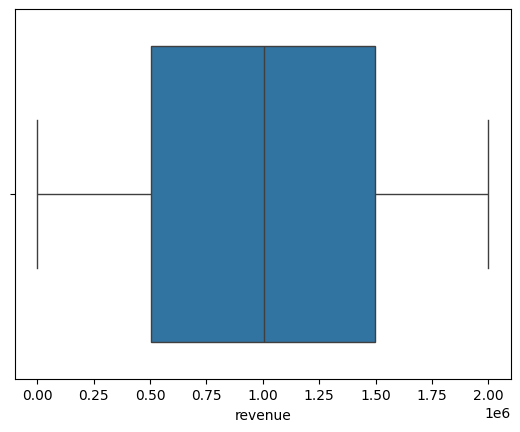

In [331]:
sns.boxplot(x=data_analysis['revenue'])
plt.show()

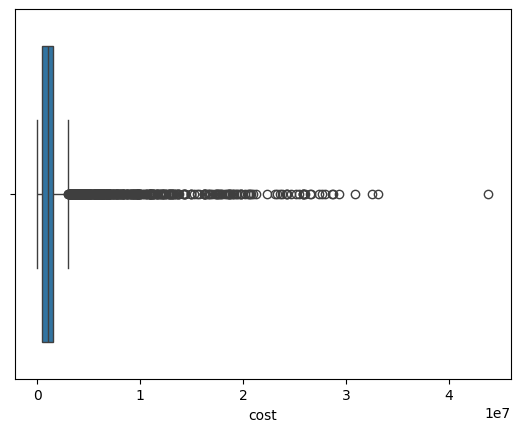

In [332]:
sns.boxplot(x=data_analysis['cost'])
plt.show()

In [333]:
data_analysis['cost'].max()

np.int64(43820920)

In [334]:
data_analysis.sort_values(by='cost', ascending=False).head()

,date,channel_id,industry_id,pic_id,category_id,supplier_id,status,revenue,cost,profit,commission,count
20126,7/3/2020,13,3,6,4,3,1,480600,43820920,-43340320,0,118896
362,1/7/2020,1,4,4,17,18,1,1727685,33065535,-31389680,51830,557
21634,7/12/2020,13,3,6,4,3,1,467695,32480575,-32012880,0,62072
15491,6/3/2020,13,3,6,4,3,1,710955,30847460,-30150725,14220,94026
21472,7/11/2020,13,3,6,4,3,1,1931605,29309917,-27378312,0,103934


In [335]:
data_analysis.drop(data_analysis[data_analysis['cost'] == 43820920].index, inplace=True)

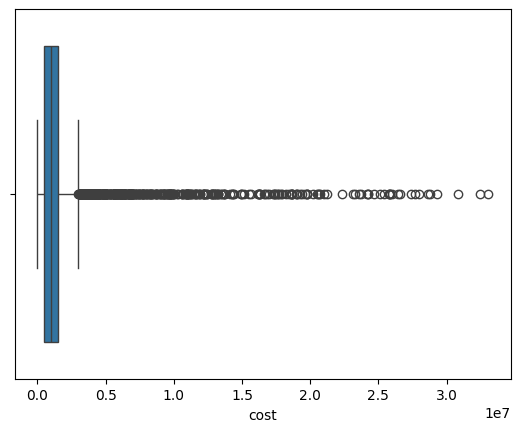

In [336]:
sns.boxplot(x=data_analysis['cost'])
plt.show()

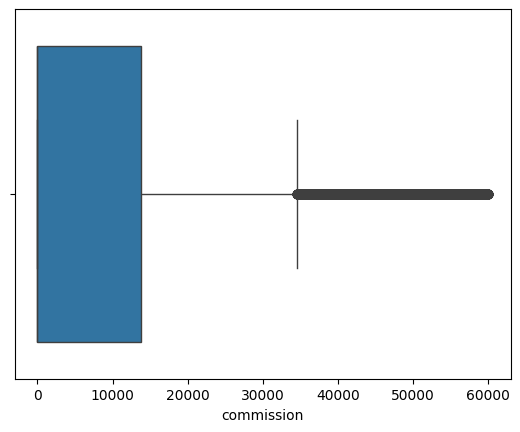

In [337]:
sns.boxplot(x=data_analysis['commission'])
plt.show()

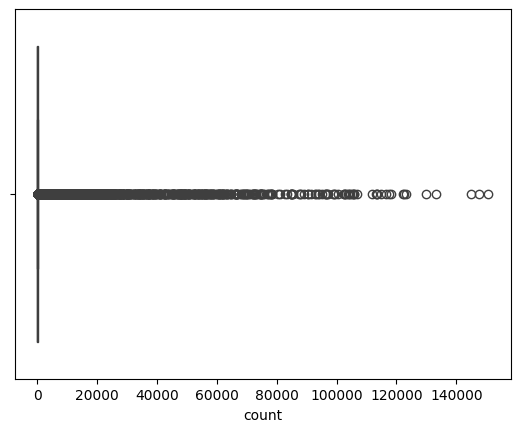

In [338]:
sns.boxplot(x=data_analysis['count'])
plt.show()

In [339]:
data_success = data_analysis[data_analysis['status'] == 1]
data_success

,date,channel_id,industry_id,pic_id,category_id,supplier_id,status,revenue,cost,profit,commission,count
1,1/1/2020,1,4,4,2,1,1,879565,879563,-26385,26387,2
2,1/1/2020,1,4,4,3,2,1,322580,322227,353,0,1
3,1/1/2020,1,4,4,4,3,1,1945450,1830540,114910,0,7592
5,1/1/2020,1,4,4,5,4,1,478455,243509,234946,0,27
7,1/1/2020,1,4,4,7,5,1,1435105,1385945,20458,28702,17
...,...,...,...,...,...,...,...,...,...,...,...,...
86028,3/31/2021,33,4,1,11,10,1,528405,349355,168480,10570,82
86029,3/31/2021,33,4,1,9,21,1,1844385,1844010,375,0,1
86030,3/31/2021,33,4,1,7,26,1,1816005,1817735,-38050,36320,4
86031,3/31/2021,33,4,1,4,30,1,1911990,1911951,39,0,7


In [340]:
data_success.describe()

,channel_id,industry_id,pic_id,category_id,supplier_id,status,revenue,cost,profit,commission,count
count,57131.000000,57131.000000,57131.000000,57131.000000,57131.000000,57131.0,5.713100e+04,5.713100e+04,5.713100e+04,57131.000000,57131.000000
mean,16.598029,3.147503,3.838196,7.714988,16.238364,1.0,1.003338e+06,1.048916e+06,-5.442687e+04,8849.424411,788.491292
std,19.798522,1.167160,2.310859,5.374806,12.013366,0.0,5.765828e+05,1.071268e+06,9.096781e+05,14005.919504,5227.584252
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.020000e+03,5.900000e+01,-3.201288e+07,0.000000,1.000000
25%,1.000000,2.000000,2.000000,4.000000,4.000000,1.0,5.046725e+05,4.907325e+05,-1.433250e+04,0.000000,3.000000
50%,9.000000,4.000000,4.000000,6.000000,16.000000,1.0,1.004470e+06,9.895300e+05,-2.400000e+01,0.000000,17.000000
75%,27.000000,4.000000,4.000000,9.000000,26.000000,1.0,1.501755e+06,1.494595e+06,5.025500e+03,14220.000000,105.000000
max,77.000000,6.000000,8.000000,26.000000,50.000000,1.0,1.999940e+06,3.306554e+07,1.859356e+06,59990.000000,150697.000000


In [341]:
data_failed = data_analysis[data_analysis['status'] != 1]
data_failed

,date,channel_id,industry_id,pic_id,category_id,supplier_id,status,revenue,cost,profit,commission,count
0,1/1/2020,1,4,4,1,1,0,98845,99048,-3173,2970,3
4,1/1/2020,1,4,4,4,3,0,310835,296239,11486,3110,200
6,1/1/2020,1,4,4,6,3,0,1971805,1951451,20354,0,33
8,1/1/2020,1,4,4,7,5,0,365630,366020,-4046,3656,4
9,1/1/2020,1,4,4,8,1,0,420370,417390,2980,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
86005,3/31/2021,43,5,4,8,3,0,1119095,1118385,710,0,1
86008,3/31/2021,43,5,4,4,3,0,1875005,1873735,1270,0,2
86013,3/31/2021,43,5,4,4,39,0,317115,317113,-6338,6340,1
86018,3/31/2021,33,4,1,4,3,0,1459055,1459249,-29374,29180,3


In [342]:
data_failed.describe()

,channel_id,industry_id,pic_id,category_id,supplier_id,status,revenue,cost,profit,commission,count
count,28901.000000,28901.000000,28901.000000,28901.000000,28901.000000,28901.0,2.890100e+04,2.890100e+04,2.890100e+04,28901.000000,28901.000000
mean,16.043839,3.030276,4.006955,6.029065,15.244594,0.0,9.995593e+05,1.010593e+06,-1.929939e+04,8265.912633,81.912148
std,19.580671,1.189116,2.305414,3.692120,13.241933,0.0,5.747340e+05,6.260646e+05,2.552405e+05,13787.520419,387.480904
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.015000e+03,9.900000e+01,-1.038667e+07,0.000000,1.000000
25%,1.000000,2.000000,2.000000,4.000000,3.000000,0.0,5.039550e+05,4.994210e+05,-1.330000e+04,0.000000,2.000000
50%,9.000000,3.000000,4.000000,6.000000,8.000000,0.0,1.001090e+06,1.000870e+06,-1.350000e+02,0.000000,5.000000
75%,20.000000,4.000000,6.000000,8.000000,29.000000,0.0,1.494290e+06,1.496755e+06,6.000000e+02,12870.000000,25.000000
max,77.000000,6.000000,8.000000,26.000000,50.000000,0.0,1.999880e+06,1.174799e+07,1.795169e+06,59980.000000,21795.000000


## Visualization & Explanatory Analysis

### 1: Analisis 2 channel yang menurut Anda memiliki performa penjualan paling baik.

In [343]:
ch_profit = data_success.groupby('channel_id').agg(total_profit=('profit', 'sum'))
ch_toppft = ch_profit.sort_values(by='total_profit', ascending=False).head(5)
ch_toppft = ch_toppft.reset_index()
ch_toppft['channel_name'] = ch_toppft['channel_id'].map(channel_map)

ch_rev = data_success.groupby('channel_id').agg(total_revenue=('revenue', 'sum'))
ch_toprev = ch_rev.sort_values(by='total_revenue', ascending=False).head(5)
ch_toprev = ch_toprev.reset_index()
ch_toprev['channel_name'] = ch_toprev['channel_id'].map(channel_map)

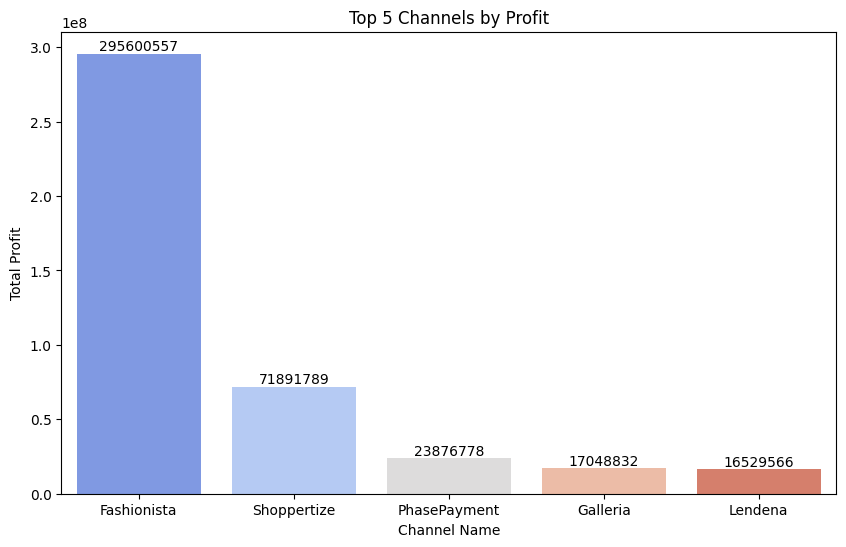

In [344]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ch_toppft, x='channel_name', y='total_profit', palette='coolwarm', hue='channel_name')
for index, value in enumerate(ch_toppft['total_profit']):
    plt.text(index, value + 2000000, f'{value:.0f}', ha='center', fontsize=10)
y_min = 0
y_max = int(max(ch_toppft['total_profit']) + (5/100 * max(ch_toppft['total_profit'])))
plt.ylim(y_min, y_max)
plt.title('Top 5 Channels by Profit')
plt.xlabel('Channel Name')
plt.ylabel('Total Profit')
plt.show()

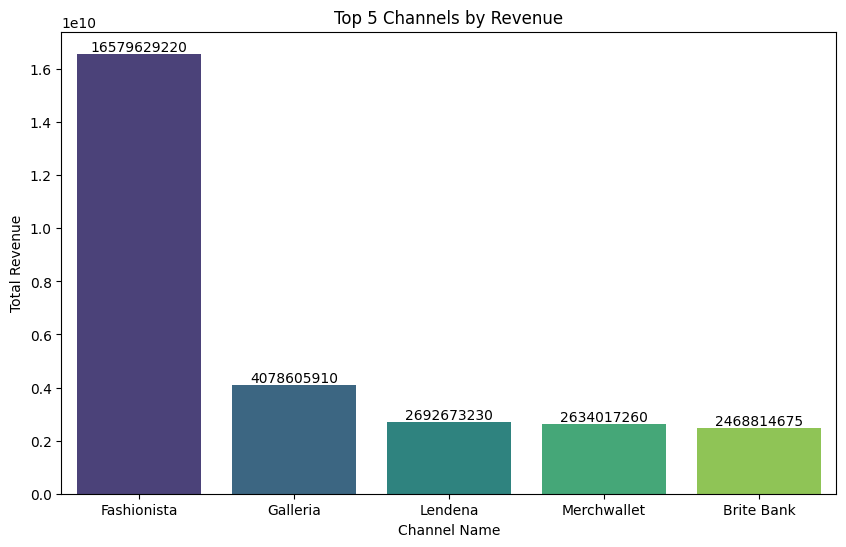

In [345]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ch_toprev, x='channel_name', y='total_revenue', palette='viridis', hue='channel_name')
for index, value in enumerate(ch_toprev['total_revenue']):
    plt.text(index, value + 100000000, f'{value:.0f}', ha='center', fontsize=10)
y_min = 0
y_max = int(max(ch_toprev['total_revenue']) + (5/100 * max(ch_toprev['total_revenue'])))
plt.ylim(y_min, y_max)
plt.title('Top 5 Channels by Revenue')
plt.xlabel('Channel Name')
plt.ylabel('Total Revenue')
plt.show()

### 2: Analisis 2 channel yang menurut Anda memiliki performa penjualan paling buruk.

In [346]:
ch_botpft = ch_profit.sort_values(by='total_profit', ascending=True).head(5)
ch_botpft = ch_botpft.reset_index()
ch_botpft['channel_name'] = ch_botpft['channel_id'].map(channel_map)

ch_botrev = ch_rev.sort_values(by='total_revenue', ascending=True).head(5)
ch_botrev = ch_botrev.reset_index()
ch_botrev['channel_name'] = ch_botrev['channel_id'].map(channel_map)

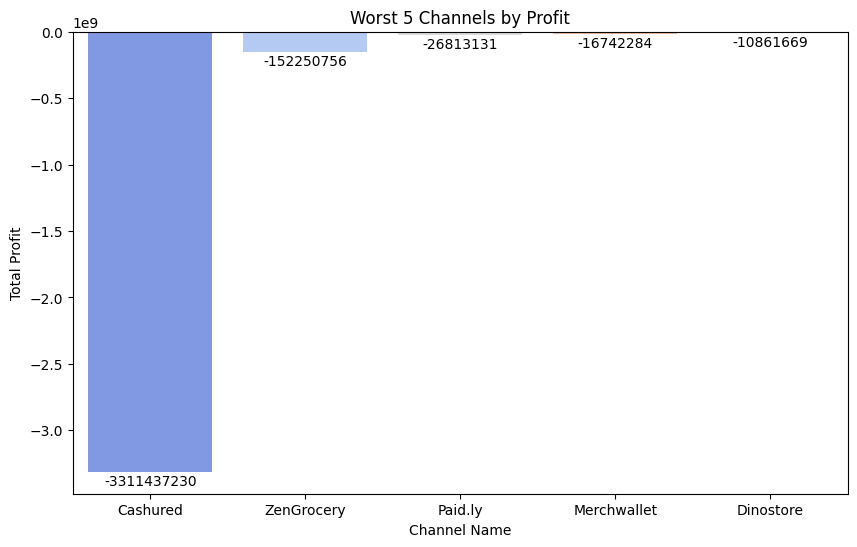

In [347]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ch_botpft, x='channel_name', y='total_profit', palette='coolwarm', hue='channel_name')
for index, value in enumerate(ch_botpft['total_profit']):
    plt.text(index, value - 100000000, f'{value:.0f}', ha='center', fontsize=10)
y_min = int(min(ch_botpft['total_profit']) + (5/100 * min(ch_botpft['total_profit'])))
y_max = 0
plt.ylim(y_min, y_max)
plt.title('Worst 5 Channels by Profit')
plt.xlabel('Channel Name')
plt.ylabel('Total Profit')
plt.show()

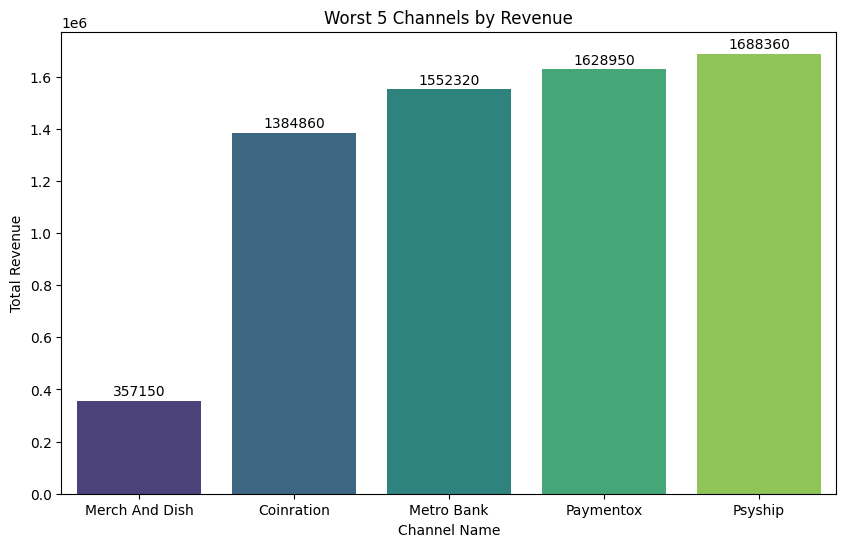

In [348]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ch_botrev, x='channel_name', y='total_revenue', palette='viridis', hue='channel_name')
for index, value in enumerate(ch_botrev['total_revenue']):
    plt.text(index, value + 20000, f'{value:.0f}', ha='center', fontsize=10)
y_min = 0
y_max = int(max(ch_botrev['total_revenue']) + (5/100 * max(ch_botrev['total_revenue'])))
plt.ylim(y_min, y_max)
plt.title('Worst 5 Channels by Revenue')
plt.xlabel('Channel Name')
plt.ylabel('Total Revenue')
plt.show()

### 3: Analisis top 2 industri yang paling profitable untuk perusahaan ini.

In [349]:
ind_anly = data_success.groupby('industry_id').agg(total_profit=('profit', 'sum'))
ind_toppft = ind_anly.sort_values(by='total_profit', ascending=False)
ind_toppft = ind_toppft.reset_index()
ind_toppft['industry_name'] = ind_toppft['industry_id'].map(industry_map)

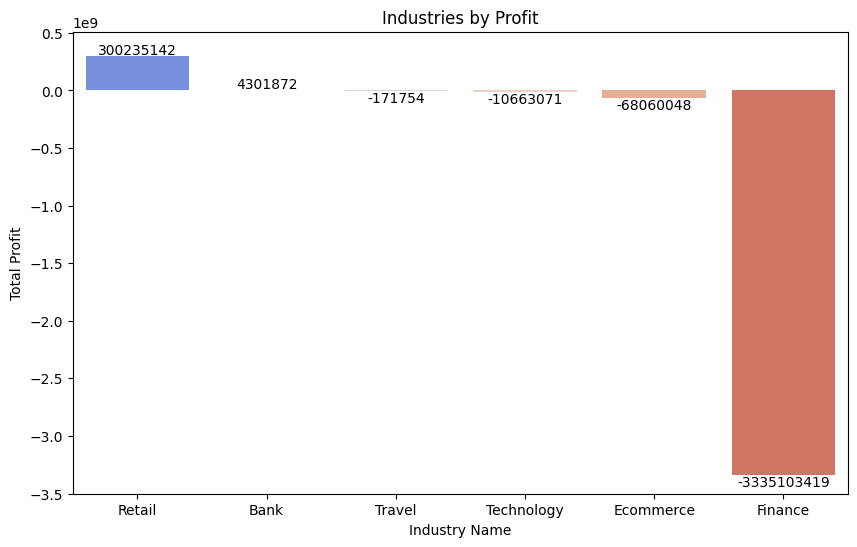

In [350]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ind_toppft, x='industry_name', y='total_profit', palette='coolwarm', hue='industry_name')
for index, value in enumerate(ind_toppft['total_profit']):
    if value > 0:
        adjusted_value = value + 10000000
    else:
        adjusted_value = value - 100000000
    plt.text(index, adjusted_value, f'{value:.0f}', ha='center', fontsize=10)
y_min = int(min(ind_toppft['total_profit']) + (5/100 * min(ind_toppft['total_profit'])))
y_max = int(max(ind_toppft['total_profit']) + (70/100 * max(ind_toppft['total_profit'])))
plt.ylim(y_min, y_max)
plt.title('Industries by Profit')
plt.xlabel('Industry Name')
plt.ylabel('Total Profit')
plt.show()

### 4: Analisis top 2 kategori yang paling profitable untuk perusahaan ini.

In [351]:
cat_anly = data_success.groupby('category_id').agg(total_profit=('profit', 'sum'))
cat_toppft = cat_anly.sort_values(by='total_profit', ascending=False).head(5)
cat_toppft = cat_toppft.reset_index()
cat_toppft['category_name'] = cat_toppft['category_id'].map(category_map)

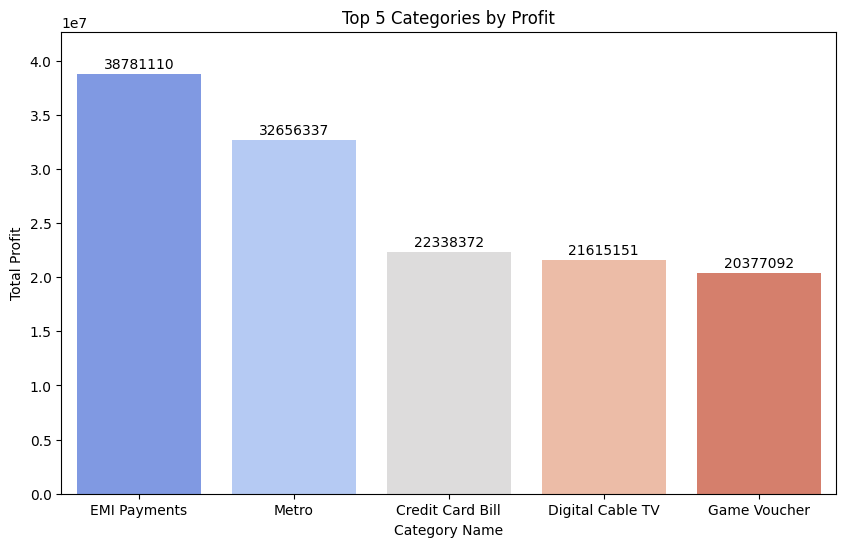

In [352]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cat_toppft, x='category_name', y='total_profit', palette='coolwarm', hue='category_name')
for index, value in enumerate(cat_toppft['total_profit']):
    plt.text(index, value + 500000, f'{value:.0f}', ha='center', fontsize=10)
y_min = 0
y_max = int(max(cat_toppft['total_profit']) + (10/100 * max(cat_toppft['total_profit'])))
plt.ylim(y_min, y_max)
plt.title('Top 5 Categories by Profit')
plt.xlabel('Category Name')
plt.ylabel('Total Profit')
plt.show()

### 5: Siapa PIC yang memilki performa paling baik dari profit yang dihasilkan?

In [353]:
pic_anly = data_success.groupby('pic_id').agg(total_profit=('profit', 'sum'))
pic_toppft = pic_anly.sort_values(by='total_profit', ascending=False).head(3)
pic_toppft = pic_toppft.reset_index()
pic_toppft['pic_name'] = pic_toppft['pic_id'].map(pic_map)

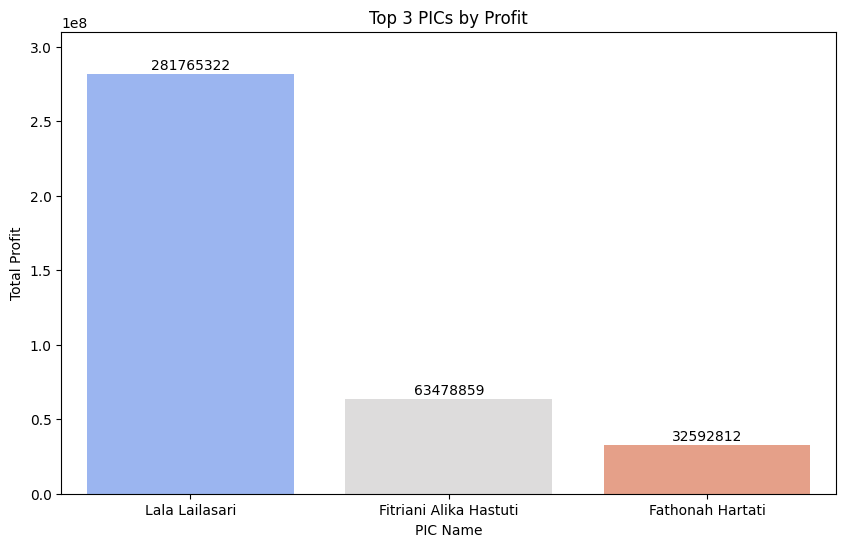

In [354]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pic_toppft, x='pic_name', y='total_profit', palette='coolwarm', hue='pic_name')
for index, value in enumerate(pic_toppft['total_profit']):
    plt.text(index, value + 3000000, f'{value:.0f}', ha='center', fontsize=10)
y_min = 0
y_max = int(max(pic_toppft['total_profit']) + (10/100 * max(pic_toppft['total_profit'])))
plt.ylim(y_min, y_max)
plt.title('Top 3 PICs by Profit')
plt.xlabel('PIC Name')
plt.ylabel('Total Profit')
plt.show()

### 6: Siapa PIC yang memilki performa paling buruk dari profit yang dihasilkan?

In [355]:
pic_botpft = pic_anly.sort_values(by='total_profit', ascending=True).head(3)
pic_botpft = pic_botpft.reset_index()
pic_botpft['pic_name'] = pic_botpft['pic_id'].map(pic_map)

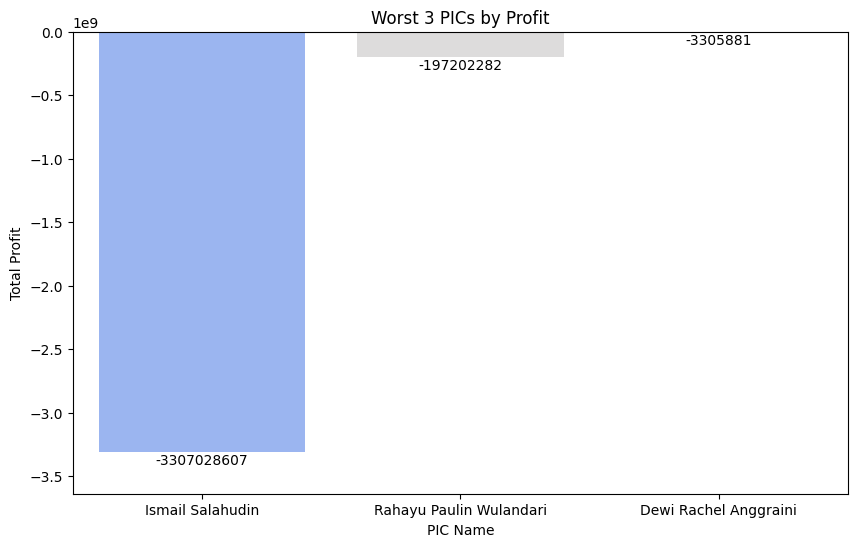

In [356]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pic_botpft, x='pic_name', y='total_profit', palette='coolwarm', hue='pic_name')
for index, value in enumerate(pic_botpft['total_profit']):
    plt.text(index, value - 100000000, f'{value:.0f}', ha='center', fontsize=10)
y_min = int(min(pic_botpft['total_profit']) + (10/100 * min(pic_botpft['total_profit'])))
y_max = 0
plt.ylim(y_min, y_max)
plt.title('Worst 3 PICs by Profit')
plt.xlabel('PIC Name')
plt.ylabel('Total Profit')
plt.show()

### 7: Analisis bagaimana tren profit pada tahun 2020.

In [357]:
data_success['date'] = pd.to_datetime(data_success['date'])
data_2020 = data_success[data_success['date'].dt.year == 2020]

C:\Users\prtma\AppData\Local\Temp\ipykernel_16052\3922340411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_success['date'] = pd.to_datetime(data_success['date'])


In [358]:
mthpft_2020 = data_2020.groupby(data_2020['date'].dt.month)['profit'].sum().reset_index()
mthpft_2020.columns = ['month', 'profit'] 

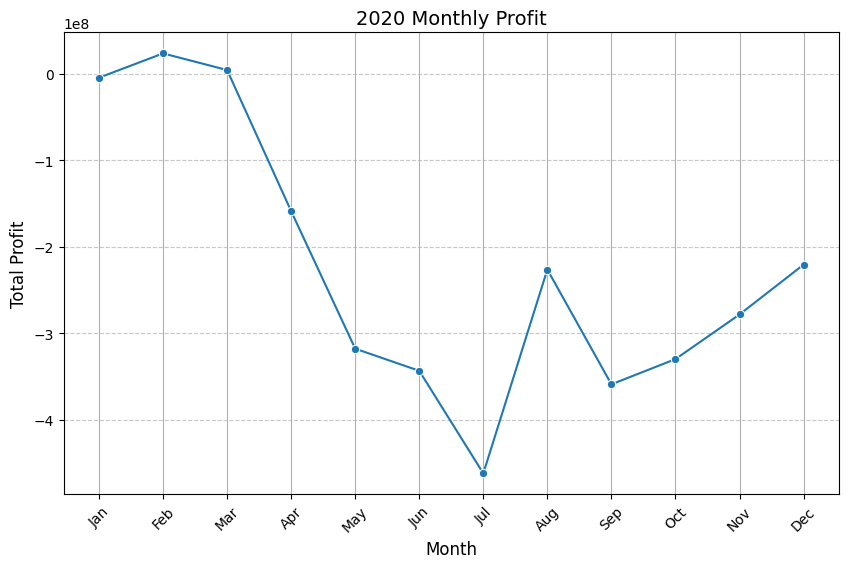

In [359]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=mthpft_2020, x='month', y='profit', marker='o')
plt.title('2020 Monthly Profit', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(True)
plt.show()

### 8: Apakah Anda menyarankan untuk menutup perusahaan ini?

In [370]:
data_success['month_year'] = data_success['date'].dt.to_period('M').astype(str)
mthpft_all_time = data_success.groupby('month_year')['profit'].sum().reset_index()
mthpft_all_time['month_year'] = pd.to_datetime(mthpft_all_time['month_year'])

C:\Users\prtma\AppData\Local\Temp\ipykernel_16052\2066390241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_success['month_year'] = data_success['date'].dt.to_period('M').astype(str)


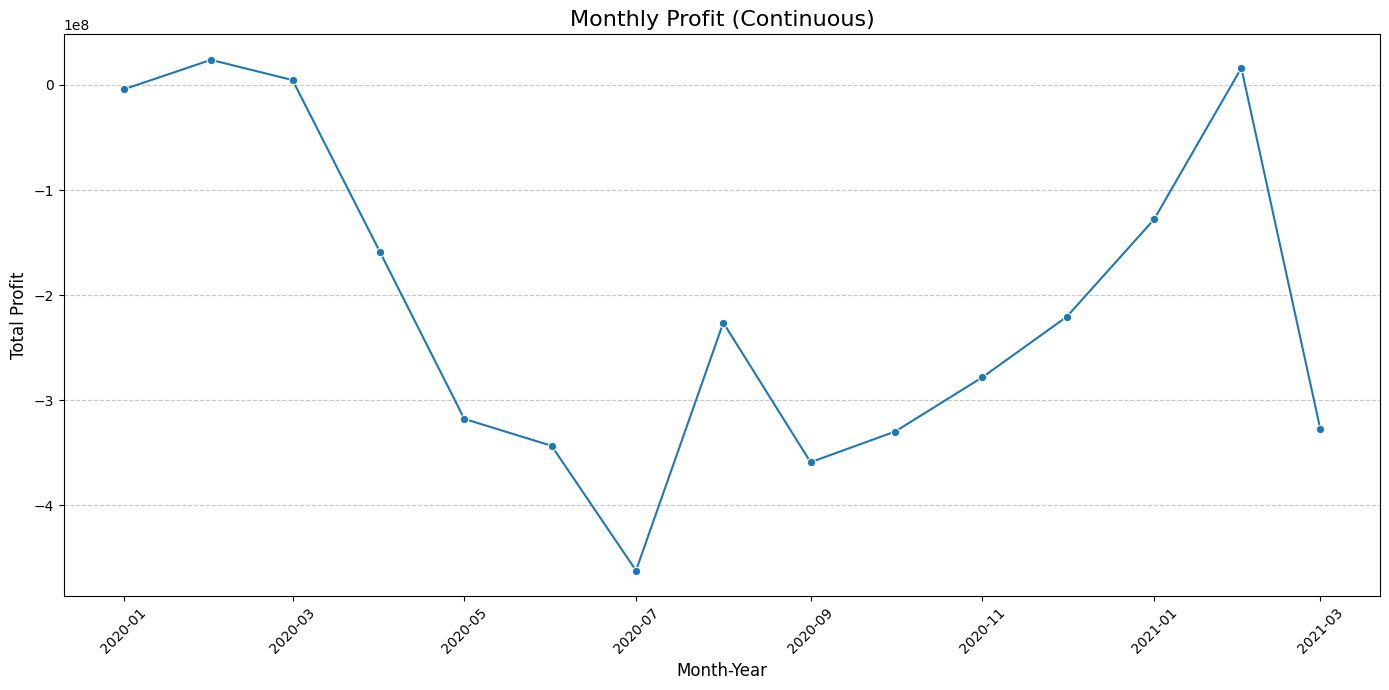

In [372]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=mthpft_all_time, x='month_year', y='profit', marker='o')
plt.title('Monthly Profit (Continuous)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()